# Gradient Descent - Lab

## Introduction

In this lab, we'll continue to formalize our work with gradient descent and once again practice coding some implementations, starting with a review of linear regression. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.

## Objectives
You will be able to:
* Create a full gradient descent algorithm

## Using Gradient Descent to Minimize OLS

In order to practice gradient descent, lets begin by investigating a simple regression case in which we are looking to minimize the Residual Sum of Squares (RSS) between our predictions and the actual values. Remember that this is referred to Ordinary Least Squares (OLS) regression. Below, is a mock dataset that we will work with. Preview the dataset. Then, we will compare to simplistic models. Finally, we will use gradient descent to improve upon these  initial models.

Good luck!

In [1]:
#The dataset
import pandas as pd
df = pd.read_excel('movie_data.xlsx')
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two Simplistic Models

Let's imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested, and need to be compared.  
The two models are:  
$domgross = 1.575 \bullet budget$  
$domgross = 1.331 \bullet budget$  
Here's a graph of the two models along with the actual data:

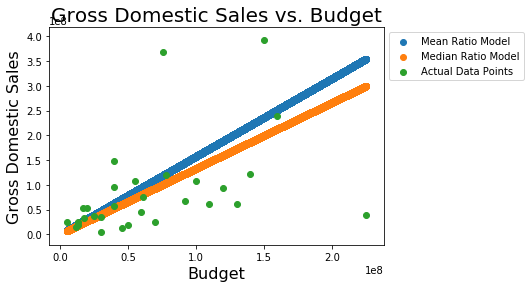

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df.budget.min(), stop=df.budget.max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') #Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') #Model 2
plt.scatter(df.budget, df.domgross, label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=20)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1,1))

## Error/Loss Functions

In compare the two models (and future ones), we need to define a metric for evaluating and comparing models to each other. Traditionally this is the residual sum of squares. As such we are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function **rss(m)** which calculates the residual sum of squares for a simplistic model $domgross = m \bullet budget$.

In [9]:
def rss(m, X=df.budget, y=df.domgross):
    model = m * X
    residuals = model - y
    return residuals.map(lambda x: x**2).sum()
    #Your code here

## Run your RSS function on the two models
Which of the two models is better?

In [10]:
print('mod 1:', rss(1.575))
print('mod 2:', rss(1.331))

mod 1: 2.7614512142376128e+17
mod 2: 2.3547212057814554e+17


Model 2 has a lower rss, meaning that it is more accurate, ever so slightly.

## Gradient Descent

Now that we have a loss function, we can use numerical methods to find a minimum to the loss function. By minimizing our loss, we have achieved an optimal solution according to our problem formulation. Here's our outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less then 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligable difference.
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, lets simply visualize our cost function. Plot the cost function output for a range of m values from -3 to 5.

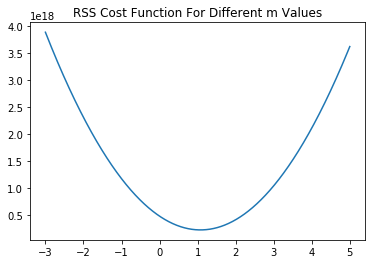

In [11]:
X = np.linspace(start= -3, stop=5, num=10**3)
y = [rss(xi) for xi in X]
plt.plot(X, y)
plt.title('RSS Cost Function For Different m Values')
plt.show()

As you can see, this is a simple cost function. The minimum is clearly around 1. With that, let's try and implement gradient descent in order to find our optimal value for m.

In [15]:
cur_x = 1.5
alpha = 1*10**(-7)
precision = 0.0000001 #Initialize a precision
previous_step_size = 1 #Helpful initialization
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter

#Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
#Your code here; create a loop as described above
while (previous_step_size > precision) & (iters < max_iters):
    print('Current Value: {} RSS Produced: {}'.format(cur_x, rss(cur_x)))
    prev_x = cur_x
    #Calculate the gradient. This is often done by hand to reduce computational complexity.
    #For here, generate points surrounding your current state, then calculate the rss of these points
    #Finally, use the np.gradient() method on this survey region. This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    cur_x -= alpha*gradient
    #Update the current x, by taking a "alpha sized" step in the direction of the gradient
    previous_step_size = abs(cur_x - prev_x)
    iters += 1
    #Update the iteration number
    print('The local minimum occurs at', cur_x)
#The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)

Current Value: 1.5 RSS Produced: 2.6084668957174013e+17
The local minimum occurs at 1.133065571442482
Current Value: 1.133065571442482 RSS Produced: 2.217773053377031e+17
The local minimum occurs at 1.1131830522748978
Current Value: 1.1131830522748978 RSS Produced: 2.2135715390729418e+17
The local minimum occurs at 1.1124754156940848
Current Value: 1.1124754156940848 RSS Produced: 2.21345414998669e+17
The local minimum occurs at 1.1124506992634624
Current Value: 1.1124506992634624 RSS Produced: 2.2134500897406422e+17
The local minimum occurs at 1.1124498365366489
Current Value: 1.1124498365366489 RSS Produced: 2.213449948066475e+17
The local minimum occurs at 1.1124498064238728


## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

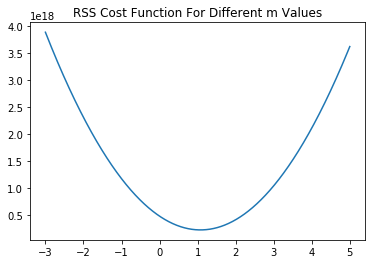

In [20]:
X = np.linspace(start= -3, stop=5, num=10**3)
y = [rss(xi) for xi in X]
plt.plot(X, y)
plt.plot(1.1124498053361267, rss(1.1124498053361267), c='red')
plt.title('RSS Cost Function For Different m Values')
plt.show()

## Summary 

In this lab you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!